<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullyi

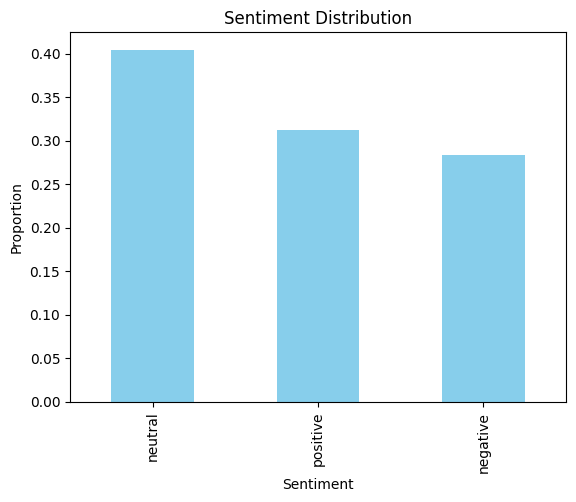

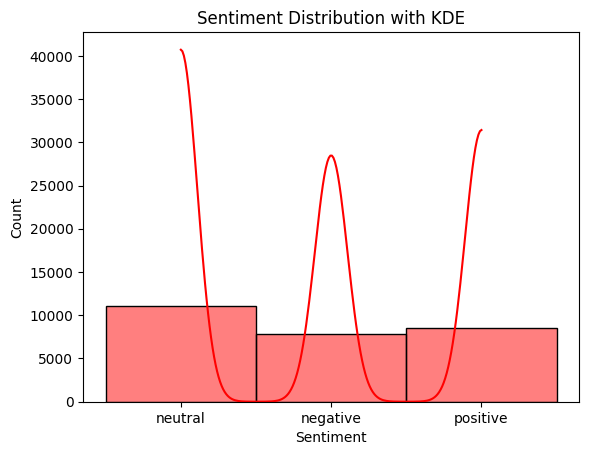

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('train.csv',encoding='latin1')

# Display basic information about the dataset
print(train_df.info())

# Display the first few rows of the dataset
print(train_df.head())

# Check for missing values
print(train_df.isnull().sum())

# Display the value counts of sentiments
print(train_df['sentiment'].value_counts())

# Plot the distribution of sentiments
train_df['sentiment'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.show()

# Plot the histogram of sentiments with KDE
sns.histplot(train_df['sentiment'], kde=True, color='r')
plt.title('Sentiment Distribution with KDE')
plt.xlabel('Sentiment')
plt.show()


In [6]:
import torch
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
from sklearn.model_selection import train_test_split

# Split train data into train and validation sets
train_data, valid_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Save the splits to new CSV files
train_data.to_csv('train_split.csv', index=False)
valid_data.to_csv('valid_split.csv', index=False)

# Define Fields
TEXT = Field(tokenize='spacy', tokenizer_language='en_core_web_sm', include_lengths=True)
LABEL = Field(sequential=False, use_vocab=False, dtype=torch.float)
FIELDS = [('textID', None), ('text', TEXT), ('selected_text', None), ('sentiment', LABEL), 
          ('Time of Tweet', None), ('Age of User', None), ('Country', None), 
          ('Population -2020', None), ('Land Area (Km²)', None), ('Density (P/Km²)', None)]

# Create TabularDatasets
train_dataset, valid_dataset, test_dataset = TabularDataset.splits(
    path='', 
    train='train_split.csv',
    validation='valid_split.csv',
    test='test.csv',
    format='csv',
    fields=FIELDS,
    skip_header=True
)

# Build the vocabulary
TEXT.build_vocab(train_dataset, max_size=25000, vectors="glove.6B.100d", unk_init=torch.Tensor.normal_)

# Create Iterators
BATCH_SIZE = 64
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_dataset, valid_dataset, test_dataset),
    batch_size=BATCH_SIZE,
    sort_within_batch=True,
    device=device)


OSError: [WinError 127] The specified procedure could not be found